In [3]:
from matplotlib import pyplot as plt
from ipywidgets import interact
import numpy as np

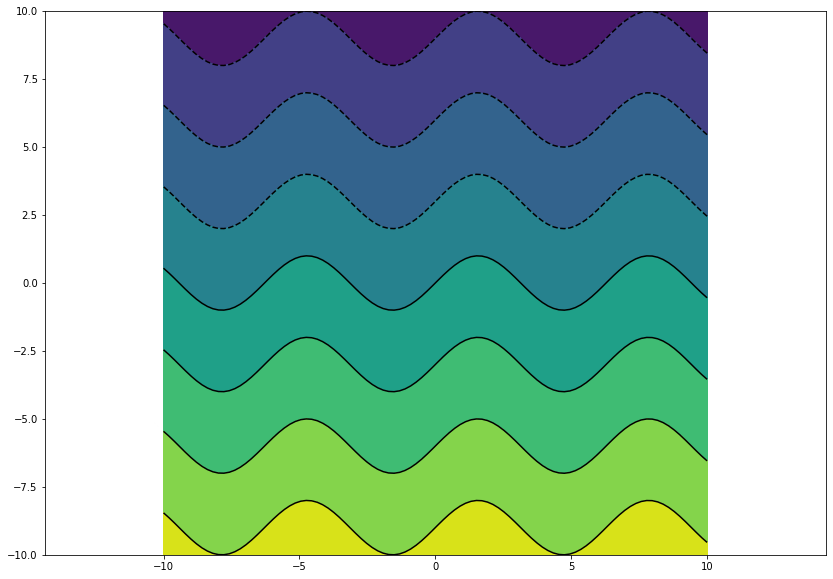

In [10]:
xg, yg = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
zg = np.sin(xg) - yg
#zg = xg ** 2 + yg ** 2
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
ax.axis('equal')
cs = ax.contourf(xg, yg, zg)
ax.contour(cs, colors='k')

In [149]:
@interact(
    a=(0., 50., 0.1),
    b=(0.1, 10., 0.1),
)
def f(
    a=25, b=3,
    #a=2.2, b=1.1,
    quiver=False,
    large=False,
    save=False,
    axes=False,
):
    figsize = (14, 10)
    if large:
        figsize = tuple(2 * x for x in figsize)
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    samples = 600
    xg, yg = np.meshgrid(np.linspace(-8, 8, samples), np.linspace(-12, 12, samples))
    #zg = xg ** 2 + np.sin(yg)
    zg = a * np.sin(xg / b) ** 2 + np.sin(yg)

    cmap = 'hsv'
    #cmap = 'gist_rainbow'
    cs = ax.contourf(xg, yg, zg, alpha=0.45, cmap=cmap)
    ax.contour(cs, colors='k', alpha=0.6)

    if not axes:
        ax.axis('off')
    if quiver:
        parts = []
        for seg in cs.allsegs:
            for subseg in seg:
                parts.append(subseg)
        xys = np.vstack(tuple(parts))
        xs = xys[:, 0]
        ys = xys[:, 1]
        #dxs = 2 * xs
        dxs = a / b * 2 * np.cos(xs / b) * np.sin(xs / b)
        dys = np.cos(ys)
        dxy_norm = np.sqrt(dxs ** 2 + dys ** 2)
        slice_ = lambda x: x[::4]

        ax.quiver(slice_(xs), slice_(ys), slice_(dxs / dxy_norm), slice_(dys / dxy_norm), alpha=0.1, scale=70)

    if save:
        fig.savefig('out.png', dpi=600)

interactive(children=(FloatSlider(value=25.0, description='a', max=50.0), FloatSlider(value=3.0, description='…